In [26]:
import cv2
import hashlib
from PIL import Image

# Load Image

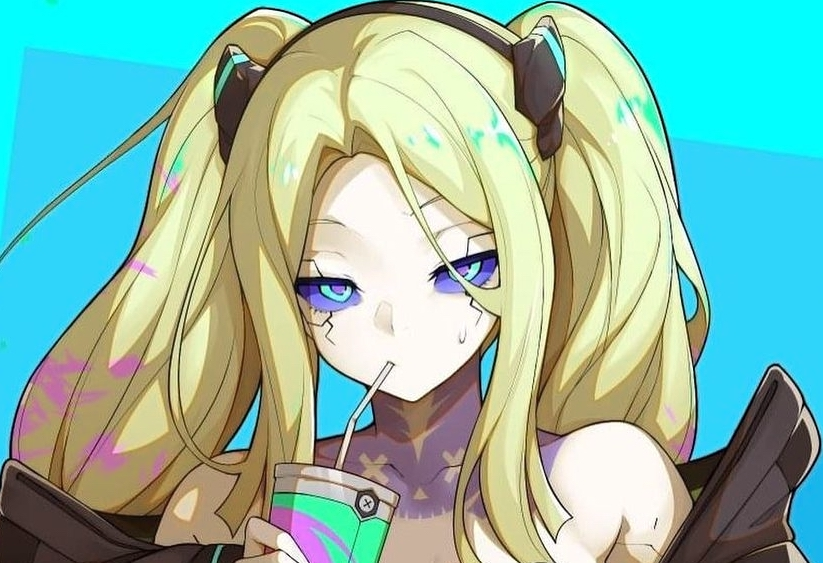

(823, 563)


In [27]:
im_path = "/content/rebecca.png"

image = Image.open(im_path)
display(image)
size = image.size
print(size)

# Split Image into Parts

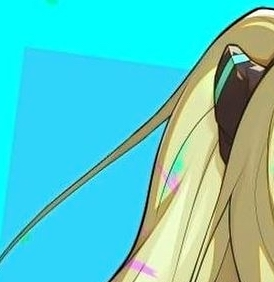

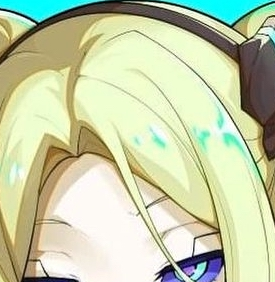

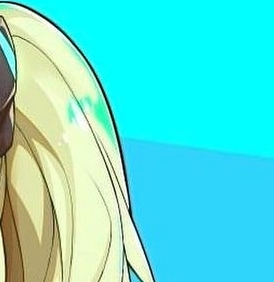

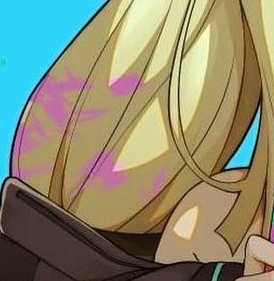

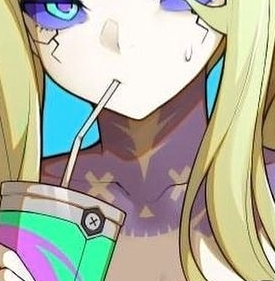

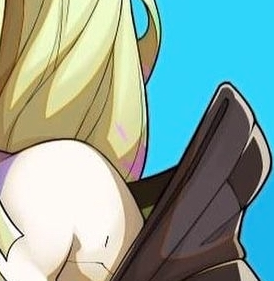

In [28]:
from PIL import Image

im_path = "/content/rebecca.png"
image = Image.open(im_path)

def split_image_into_parts(image, cols=3, rows=2):
    width, height = image.size

    width_part = width / cols
    height_part = height / rows

    parts = []
    for row in range(rows):
        for col in range(cols):
            x = col * width_part
            y = row * height_part
            w = width_part
            h = height_part

            part = image.crop((x, y, x+w, y+h))

            parts.append(part)

    return parts

#Code to Display image parts

im_parts = split_image_into_parts(image, cols=3, rows=2)
rows = 2
cols = 3
for i in range(rows):
    for j in range(cols):
        im_parts[i*cols + j].show()


# Joining Back of Parts

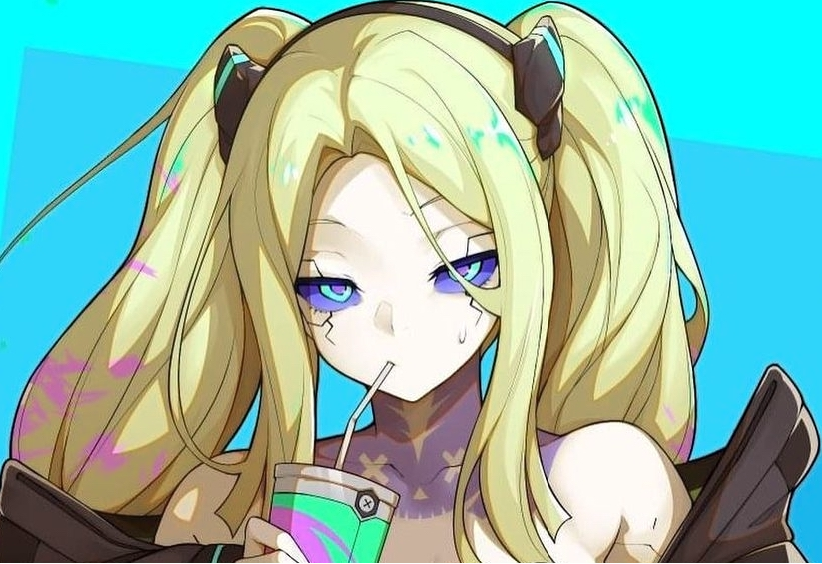

In [29]:
def join_image_parts(outer_list_tiles):
    # Get the size of the original image
    part_width, part_height = outer_list_tiles[0].size
    width = part_width * 3
    height = part_height * 2

    # Create a blank image to hold the joined image parts
    joined_image = Image.new(outer_list_tiles[0].mode, (width, height), (255, 255, 255, 0))

    # Paste the image parts onto the blank image
    for row in range(2):
        for col in range(3):
            part = outer_list_tiles[row * 3 + col]
            x = col * part_width
            y = row * part_height
            joined_image.paste(part, (x, y))

    return joined_image

joined_image = join_image_parts(im_parts)
display(joined_image)


# Save joined Image


In [30]:
# your code here
joined_image.save('rejoined1_image.png')

In [31]:
img = Image.open("/content/rejoined1_image.png")
size = img.size
print(size)

(822, 564)


# Compare Original and Saved Image Hashes (should be same)

In [25]:
def get_hash(file_path):
    return hashlib.md5(cv2.imread(file_path).tobytes()).hexdigest()

# Compare Hashes
new_im_path = "/content/rejoined1_image.png"
print("Hash of original Image:",get_hash(im_path))
print("Hash of New Image:",get_hash(new_im_path))


Hash of original Image: e2158d7af4672045e2f14b35e1fce5a3
Hash of New Image: 88da0f44d3bf01be3b954902ee80b547
